In [1]:
import keras
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from keras.layers import Dense

from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical

%matplotlib inline

Using TensorFlow backend.


In [2]:
from numpy import genfromtxt
EEG = genfromtxt("C:/Users/SoobinYim/workspace/Confusion during MOOC/EEG_data.csv", delimiter=",")

In [3]:
#removal = [2,3,4,5,6,7,8,9,10,11,12,13]
#X = np.delete(EEG, list(set(removal+[14])), axis=1)
EEG=EEG[1:,:]
X=EEG[:,5:-2]
y = EEG[:, [14]]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

In [5]:
from keras.models import Sequential, Model 
from keras.utils import np_utils
from keras.layers import Dense, Conv2D, Convolution2D, MaxPooling2D, Dropout, Flatten, TimeDistributed, InputLayer, LSTM
from keras.layers import Input, Reshape, Activation, add, Add
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model

In [25]:
def model_create(eeg_data):
    eeg_input=Input(shape=(8,)) #입력 정의
    
    eeg_output = Dense(50, activation='relu')(eeg_input)
    eeg_output = Dropout(0.5)(eeg_output)
    eeg_output = Dense(100, activation='relu')(eeg_input)
    eeg_output = Dropout(0.5)(eeg_output)
    eeg_output = Dense(150, activation='relu')(eeg_input)
    eeg_output = Dropout(0.5)(eeg_output)
    eeg_output = Dense(200, activation='relu')(eeg_output)
    
    model = Dense(1, activation='sigmoid')(eeg_output)
    
    model = keras.models.Model(inputs=eeg_input, outputs=model) #모델 생성(전체 모델 정의)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    #SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))
    
    return model 

In [26]:
model=model_create(X)
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 8)                 0         
_________________________________________________________________
dense_10 (Dense)             (None, 150)               1350      
_________________________________________________________________
dropout_6 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 200)               30200     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 201       
Total params: 31,751
Trainable params: 31,751
Non-trainable params: 0
_________________________________________________________________


In [27]:
hist=model.fit(X_train, y_train, epochs=300, batch_size=50, validation_data=(X_test,y_test))

Train on 8967 samples, validate on 3844 samples
Epoch 1/500
8967/8967 [==============================] - 1s 79us/step - loss: 7727.2372 - accuracy: 0.5049 - val_loss: 4666.1564 - val_accuracy: 0.4873
Epoch 2/500
8967/8967 [==============================] - 1s 62us/step - loss: 3395.2980 - accuracy: 0.5080 - val_loss: 642.3781 - val_accuracy: 0.5492
Epoch 3/500
8967/8967 [==============================] - 1s 61us/step - loss: 1881.1311 - accuracy: 0.5177 - val_loss: 431.4470 - val_accuracy: 0.5182
Epoch 4/500
8967/8967 [==============================] - 1s 62us/step - loss: 1181.6567 - accuracy: 0.5122 - val_loss: 462.1299 - val_accuracy: 0.5239
Epoch 5/500
8967/8967 [==============================] - 1s 62us/step - loss: 719.6335 - accuracy: 0.5081 - val_loss: 209.4748 - val_accuracy: 0.5193
Epoch 6/500
8967/8967 [==============================] - 1s 62us/step - loss: 432.1817 - accuracy: 0.5072 - val_loss: 199.2225 - val_accuracy: 0.5351
Epoch 7/500
8967/8967 [========================

8967/8967 [==============================] - 1s 67us/step - loss: 0.6895 - accuracy: 0.5166 - val_loss: 0.8418 - val_accuracy: 0.5166
Epoch 57/500
8967/8967 [==============================] - 1s 60us/step - loss: 0.6909 - accuracy: 0.5158 - val_loss: 0.8107 - val_accuracy: 0.5166
Epoch 58/500
8967/8967 [==============================] - 1s 62us/step - loss: 0.6891 - accuracy: 0.5166 - val_loss: 0.8270 - val_accuracy: 0.5166
Epoch 59/500
8967/8967 [==============================] - 1s 62us/step - loss: 0.6891 - accuracy: 0.5167 - val_loss: 0.8220 - val_accuracy: 0.5166
Epoch 60/500
8967/8967 [==============================] - 1s 63us/step - loss: 0.6891 - accuracy: 0.5163 - val_loss: 0.8171 - val_accuracy: 0.5161
Epoch 61/500
8967/8967 [==============================] - 1s 62us/step - loss: 0.7009 - accuracy: 0.5162 - val_loss: 0.7883 - val_accuracy: 0.5164
Epoch 62/500
8967/8967 [==============================] - 1s 62us/step - loss: 0.6897 - accuracy: 0.5156 - val_loss: 0.8305 - val_a

Epoch 112/500
8967/8967 [==============================] - 1s 63us/step - loss: 0.6905 - accuracy: 0.5148 - val_loss: 0.8978 - val_accuracy: 0.5153
Epoch 113/500
8967/8967 [==============================] - 1s 62us/step - loss: 0.6907 - accuracy: 0.5146 - val_loss: 0.9130 - val_accuracy: 0.5153
Epoch 114/500
8967/8967 [==============================] - 1s 61us/step - loss: 0.6905 - accuracy: 0.5149 - val_loss: 0.9129 - val_accuracy: 0.5153
Epoch 115/500
8967/8967 [==============================] - 1s 62us/step - loss: 0.7513 - accuracy: 0.5147 - val_loss: 0.7772 - val_accuracy: 0.5153
Epoch 116/500
8967/8967 [==============================] - 1s 62us/step - loss: 0.7927 - accuracy: 0.5149 - val_loss: 1.2235 - val_accuracy: 0.5161
Epoch 117/500
8967/8967 [==============================] - 1s 61us/step - loss: 0.8071 - accuracy: 0.5131 - val_loss: 0.9766 - val_accuracy: 0.5151
Epoch 118/500
8967/8967 [==============================] - 1s 62us/step - loss: 0.7534 - accuracy: 0.5135 - val_

8967/8967 [==============================] - 1s 64us/step - loss: 0.6917 - accuracy: 0.5132 - val_loss: 0.8021 - val_accuracy: 0.5148
Epoch 168/500
8967/8967 [==============================] - 1s 61us/step - loss: 0.6914 - accuracy: 0.5135 - val_loss: 0.8014 - val_accuracy: 0.5148
Epoch 169/500
8967/8967 [==============================] - 1s 61us/step - loss: 0.6916 - accuracy: 0.5134 - val_loss: 0.8005 - val_accuracy: 0.5148
Epoch 170/500
8967/8967 [==============================] - 1s 61us/step - loss: 0.6915 - accuracy: 0.5133 - val_loss: 0.7998 - val_accuracy: 0.5148
Epoch 171/500
8967/8967 [==============================] - 1s 62us/step - loss: 0.6912 - accuracy: 0.5137 - val_loss: 0.7998 - val_accuracy: 0.5148
Epoch 172/500
8967/8967 [==============================] - 1s 61us/step - loss: 0.6915 - accuracy: 0.5134 - val_loss: 0.7995 - val_accuracy: 0.5148
Epoch 173/500
8967/8967 [==============================] - 1s 62us/step - loss: 0.6914 - accuracy: 0.5135 - val_loss: 0.7993 -

8967/8967 [==============================] - 1s 62us/step - loss: 0.6917 - accuracy: 0.5133 - val_loss: 1.1542 - val_accuracy: 0.5148
Epoch 223/500
8967/8967 [==============================] - 1s 61us/step - loss: 0.6916 - accuracy: 0.5135 - val_loss: 1.1530 - val_accuracy: 0.5148
Epoch 224/500
8967/8967 [==============================] - 1s 62us/step - loss: 0.6916 - accuracy: 0.5134 - val_loss: 1.1535 - val_accuracy: 0.5148
Epoch 225/500
8967/8967 [==============================] - 1s 61us/step - loss: 0.6918 - accuracy: 0.5133 - val_loss: 1.1527 - val_accuracy: 0.5148
Epoch 226/500
8967/8967 [==============================] - 1s 62us/step - loss: 0.6920 - accuracy: 0.5127 - val_loss: 1.1519 - val_accuracy: 0.5148
Epoch 227/500
8967/8967 [==============================] - 1s 63us/step - loss: 0.6915 - accuracy: 0.5134 - val_loss: 1.1517 - val_accuracy: 0.5148
Epoch 228/500
8967/8967 [==============================] - 1s 61us/step - loss: 0.6918 - accuracy: 0.5133 - val_loss: 1.1515 -

8967/8967 [==============================] - 1s 63us/step - loss: 0.6913 - accuracy: 0.5138 - val_loss: 1.1025 - val_accuracy: 0.5148
Epoch 278/500
8967/8967 [==============================] - 1s 62us/step - loss: 0.6916 - accuracy: 0.5133 - val_loss: 1.1025 - val_accuracy: 0.5148
Epoch 279/500
8967/8967 [==============================] - 1s 62us/step - loss: 0.6914 - accuracy: 0.5137 - val_loss: 1.1028 - val_accuracy: 0.5148
Epoch 280/500
8967/8967 [==============================] - 1s 63us/step - loss: 0.6916 - accuracy: 0.5133 - val_loss: 1.1022 - val_accuracy: 0.5148
Epoch 281/500
8967/8967 [==============================] - 1s 63us/step - loss: 0.6915 - accuracy: 0.5135 - val_loss: 1.1001 - val_accuracy: 0.5148
Epoch 282/500
8967/8967 [==============================] - 1s 62us/step - loss: 0.6920 - accuracy: 0.5130 - val_loss: 1.0957 - val_accuracy: 0.5148
Epoch 283/500
8967/8967 [==============================] - 1s 65us/step - loss: 0.6914 - accuracy: 0.5135 - val_loss: 1.0955 -

8967/8967 [==============================] - 1s 62us/step - loss: 0.6918 - accuracy: 0.5131 - val_loss: 1.0667 - val_accuracy: 0.5148
Epoch 333/500
8967/8967 [==============================] - 1s 61us/step - loss: 0.6913 - accuracy: 0.5137 - val_loss: 1.0667 - val_accuracy: 0.5148
Epoch 334/500
8967/8967 [==============================] - 1s 62us/step - loss: 0.6919 - accuracy: 0.5130 - val_loss: 1.0667 - val_accuracy: 0.5148
Epoch 335/500
8967/8967 [==============================] - 1s 62us/step - loss: 0.6914 - accuracy: 0.5139 - val_loss: 1.0667 - val_accuracy: 0.5148
Epoch 336/500
8967/8967 [==============================] - 1s 63us/step - loss: 0.6915 - accuracy: 0.5135 - val_loss: 1.0667 - val_accuracy: 0.5148
Epoch 337/500
8967/8967 [==============================] - 1s 62us/step - loss: 0.6916 - accuracy: 0.5135 - val_loss: 1.0668 - val_accuracy: 0.5148
Epoch 338/500
8967/8967 [==============================] - 1s 61us/step - loss: 0.6913 - accuracy: 0.5137 - val_loss: 1.0667 -

8967/8967 [==============================] - 1s 62us/step - loss: 0.6917 - accuracy: 0.5131 - val_loss: 1.0668 - val_accuracy: 0.5148
Epoch 388/500
8967/8967 [==============================] - 1s 62us/step - loss: 0.6916 - accuracy: 0.5135 - val_loss: 1.0668 - val_accuracy: 0.5148
Epoch 389/500
8967/8967 [==============================] - 1s 62us/step - loss: 0.6915 - accuracy: 0.5134 - val_loss: 1.0668 - val_accuracy: 0.5148
Epoch 390/500
8967/8967 [==============================] - 1s 62us/step - loss: 0.6916 - accuracy: 0.5134 - val_loss: 1.0668 - val_accuracy: 0.5148
Epoch 391/500
8967/8967 [==============================] - 1s 64us/step - loss: 0.6918 - accuracy: 0.5131 - val_loss: 1.0668 - val_accuracy: 0.5148
Epoch 392/500
8967/8967 [==============================] - 1s 62us/step - loss: 0.6918 - accuracy: 0.5132 - val_loss: 1.0668 - val_accuracy: 0.5148
Epoch 393/500
8967/8967 [==============================] - 1s 63us/step - loss: 0.6913 - accuracy: 0.5138 - val_loss: 1.0668 -

8967/8967 [==============================] - 1s 65us/step - loss: 0.6920 - accuracy: 0.5131 - val_loss: 1.0668 - val_accuracy: 0.5148
Epoch 443/500
8967/8967 [==============================] - 1s 63us/step - loss: 0.6916 - accuracy: 0.5132 - val_loss: 1.0668 - val_accuracy: 0.5148
Epoch 444/500
8967/8967 [==============================] - 1s 64us/step - loss: 0.6916 - accuracy: 0.5134 - val_loss: 1.0668 - val_accuracy: 0.5148
Epoch 445/500
8967/8967 [==============================] - 1s 63us/step - loss: 0.6916 - accuracy: 0.5135 - val_loss: 1.0668 - val_accuracy: 0.5148
Epoch 446/500
8967/8967 [==============================] - 1s 63us/step - loss: 0.6915 - accuracy: 0.5137 - val_loss: 1.0668 - val_accuracy: 0.5148
Epoch 447/500
8967/8967 [==============================] - 1s 65us/step - loss: 0.6917 - accuracy: 0.5134 - val_loss: 1.0668 - val_accuracy: 0.5148
Epoch 448/500
8967/8967 [==============================] - 1s 63us/step - loss: 0.6912 - accuracy: 0.5139 - val_loss: 1.0668 -

8967/8967 [==============================] - 1s 63us/step - loss: 0.6919 - accuracy: 0.5131 - val_loss: 1.0668 - val_accuracy: 0.5148
Epoch 498/500
8967/8967 [==============================] - 1s 63us/step - loss: 0.6912 - accuracy: 0.5139 - val_loss: 1.0668 - val_accuracy: 0.5148
Epoch 499/500
8967/8967 [==============================] - 1s 64us/step - loss: 0.6918 - accuracy: 0.5134 - val_loss: 1.0668 - val_accuracy: 0.5148
Epoch 500/500
8967/8967 [==============================] - 1s 64us/step - loss: 0.6916 - accuracy: 0.5135 - val_loss: 1.0668 - val_accuracy: 0.5148


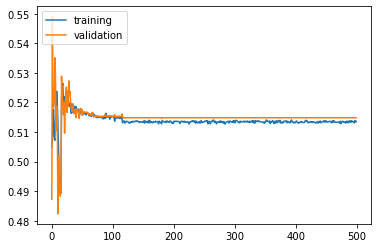

In [28]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [29]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

3844/3844 [==============================] - 0s 44us/step
Test accuracy:  0.5148283243179321
